In [20]:
from google.colab import files
uploaded = files.upload()

Saving scores_data.csv to scores_data (1).csv


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('scores_data.csv')

In [23]:
print('Data Description: \n','*'*20)
df.info()
print('\n Check Duplicates: \n', '*'*20)
df.duplicated().sum()

Data Description: 
 ********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB

 Check Duplicates: 
 ********************


np.int64(0)

In [24]:
df.columns = [c.strip() for c in df.columns]

In [25]:
df["perform_Score"] = (df["Score"].astype(str).str.split("/").str[0].str.strip().astype(int))
df["Total_Score"] = (df["Score"].astype(str).str.split("/").str[1].str.strip().astype(int))

In [27]:
df = df.drop('Score', axis=1)

In [28]:
df.head()

,Batch,User_ID,perform_Score,Total_Score
0,AI_ELITE_7,uid_149,6,7
1,AI_ELITE_7,uid_148,6,7
2,AI_ELITE_7,uid_147,7,7
3,AI_ELITE_7,uid_146,7,7
4,AI_ELITE_7,uid_145,4,7


In [29]:
students_per_batch = df.groupby("Batch")["User_ID"].nunique()
print(students_per_batch)

Batch
AI_ELITE_4    48
AI_ELITE_6    48
AI_ELITE_7    53
Name: User_ID, dtype: int64


In [47]:
pivot_df = pd.pivot_table(
    df,
    index="perform_Score",
    columns="Batch",
    values="User_ID",
    aggfunc="count",
    fill_value=0
)

pivot_df.style.background_gradient(cmap='Blues')

Batch,AI_ELITE_4,AI_ELITE_6,AI_ELITE_7
perform_Score,,,
0,1,1,0
1,1,2,0
2,7,3,2
3,8,9,7
4,19,11,10
5,8,13,11
6,1,4,13
7,3,5,10


In [49]:
batch_stats = df.groupby("Batch")["perform_Score"].agg(
    count="count",
    mean="mean",
    median="median",
    min="min",
    max="max",
    std="std"
)

batch_stats


,count,mean,median,min,max,std
Batch,,,,,,
AI_ELITE_4,48,3.791667,4.0,0,7,1.443376
AI_ELITE_6,48,4.229167,4.0,0,7,1.640441
AI_ELITE_7,53,5.056604,5.0,2,7,1.446682


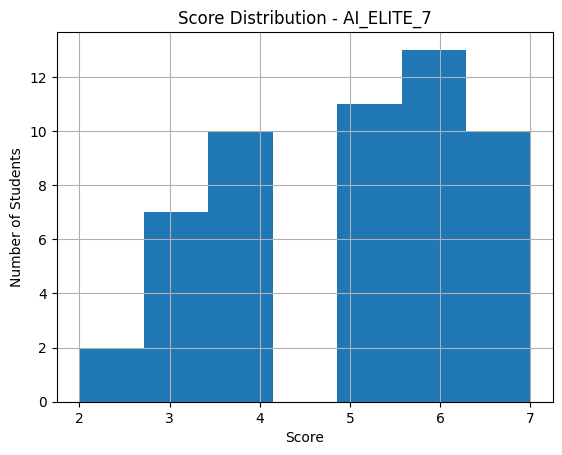

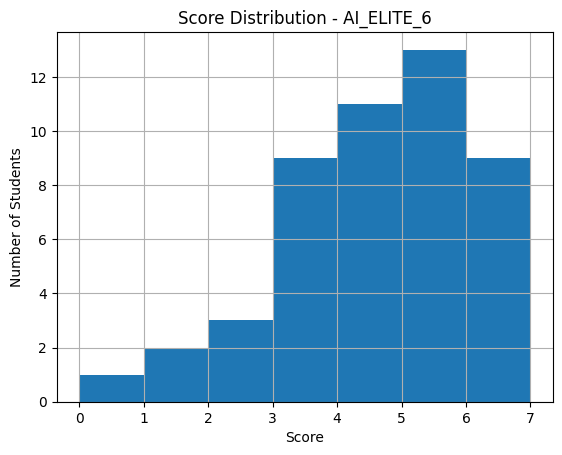

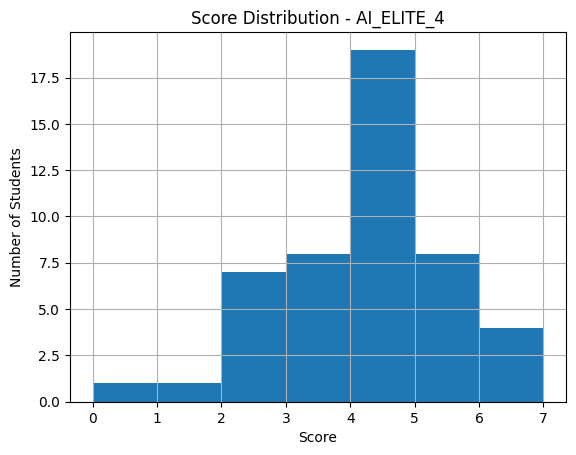

In [51]:
for batch in df["Batch"].unique():
    df[df["Batch"] == batch]["perform_Score"].hist(bins=7)
    plt.title(f"Score Distribution - {batch}")
    plt.xlabel("Score")
    plt.ylabel("Number of Students")
    plt.show()

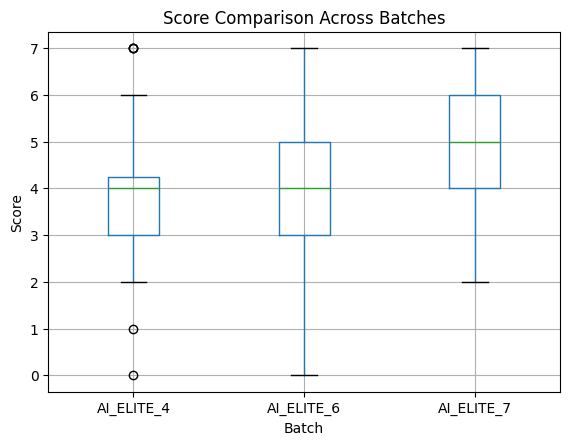

In [53]:
df.boxplot(column="perform_Score", by="Batch")
plt.title("Score Comparison Across Batches")
plt.suptitle("")
plt.xlabel("Batch")
plt.ylabel("Score")
plt.show()

In [54]:
high_scorers = (
    df[df["perform_Score"] >= df["perform_Score"].mean()]
    .groupby("Batch")["User_ID"]
    .count() / df.groupby("Batch")["User_ID"].count()
) * 100

high_scorers.round(2)


,User_ID
Batch,
AI_ELITE_4,25.00
AI_ELITE_6,45.83
AI_ELITE_7,64.15


In [56]:
batch_ranking = df.groupby("Batch")["perform_Score"].mean().sort_values(ascending=False)
batch_ranking.round(2)


,perform_Score
Batch,
AI_ELITE_7,5.06
AI_ELITE_6,4.23
AI_ELITE_4,3.79


In [59]:
consistency = df.groupby("Batch")["perform_Score"].std().sort_values()
consistency.round(2)

,perform_Score
Batch,
AI_ELITE_4,1.44
AI_ELITE_7,1.45
AI_ELITE_6,1.64


In [60]:

print(f"Best performing batch (highest average score): {batch_ranking.index[0]}")
print(f"Most consistent batch (lowest score variation): {consistency.index[0]}")

Best performing batch (highest average score): AI_ELITE_7
Most consistent batch (lowest score variation): AI_ELITE_4


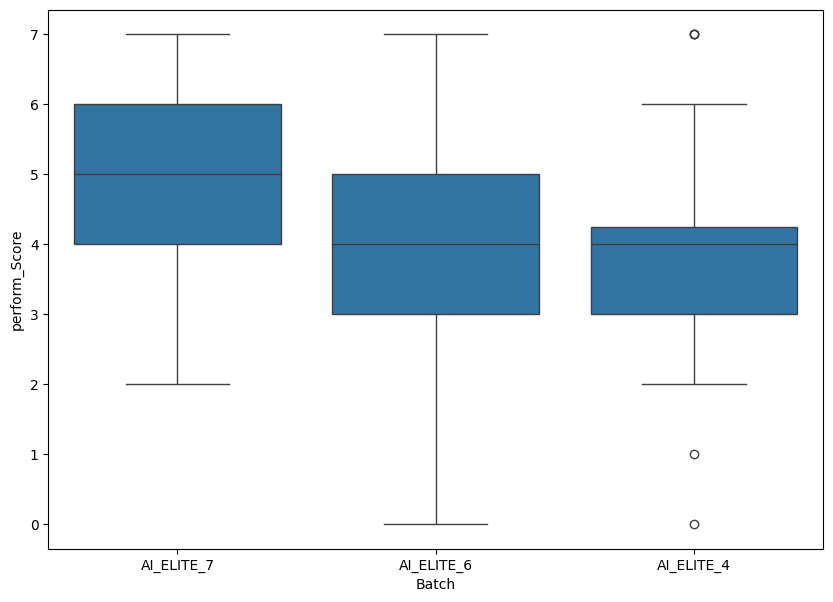

In [68]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Batch", y="perform_Score", data=df)
plt.show()

In [69]:
from scipy.stats import f_oneway

In [70]:
elite_4 = df[df["Batch"] == "AI_ELITE_4"]["perform_Score"]
elite_6 = df[df["Batch"] == "AI_ELITE_6"]["perform_Score"]
elite_7 = df[df["Batch"] == "AI_ELITE_7"]["perform_Score"]

f_stat, p_value = f_oneway(elite_4, elite_6, elite_7)

print("F-statistic:", round(f_stat, 3))
print("P-value:", round(p_value, 5))

if p_value < 0.05:
    print("There is a significant difference in performance across batches.")
else:
    print("There is no significant difference in performance across batches")

F-statistic: 9.194
P-value: 0.00017
There is a significant difference in performance across batches.
